In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [177]:
# Read nbsafety file
f = open("../stats.txt", "r+")
lines = f.readlines()[1:]
lines = [line[1:-2].split(",") for line in lines]
nbsafety_processed_trace_sessions = {
    (int(line[0].strip()), int(line[1].strip())): (int(line[-3].strip()), int(line[-2].strip()), bool(line[-1].strip()))
    for line in lines
}

In [178]:
# Read nbgather file
f = open("../nbgather_stats.txt", "r+")
lines = f.readlines()[1:]
lines = [line[1:-2].split(",") for line in lines]
nbgather_processed_trace_sessions = {
    (int(line[0].strip()), int(line[1].strip())): int(line[2].strip()) for line in lines
}

In [179]:
# Read nbgather successes

f = open("../nbgather_slice_runs.txt", "r+")
lines = f.readlines()[1:]
nbgather_slice_runs = {}

for line in lines:
    filename, status = line.strip().split(',')
    trace = int(filename.split('_')[0])
    session = int(filename.split('_')[1].split('.')[0])
    nbgather_slice_runs[(trace, session)] = int(status)

In [180]:
nbsafety_df = pd.DataFrame({"key": nbsafety_processed_trace_sessions.keys(), "nbsafety_line_size": nbsafety_processed_trace_sessions.values()})
nbgather_df = pd.DataFrame({"key": nbgather_processed_trace_sessions.keys(), "nbgather_line_size": nbgather_processed_trace_sessions.values()})

nbgather_run_df = pd.DataFrame({"key": nbgather_slice_runs.keys(), "exit_status": nbgather_slice_runs.values()})

In [181]:
df = nbsafety_df.merge(nbgather_df, on=['key'], how='inner').merge(nbgather_run_df, on=['key'], how='inner')
df[['nbsafety_slice_size', 'nbsafety_line_size', 'nbsafety_reproduced']] = pd.DataFrame(df['nbsafety_line_size'].to_list(), index=df.index)

In [182]:
# df = df[df['nbsafety_slice_size'] > 1].reset_index(drop=True)

df = df[df['nbsafety_reproduced'] == True].reset_index(drop=True)

df = df[df['exit_status'] == 0]

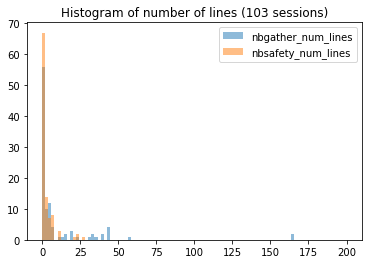

In [183]:
bins = np.linspace(0, 200, 100)
plt.hist(df['nbgather_line_size'], bins=bins, alpha=0.5, label='nbgather_num_lines')
plt.hist(df['nbsafety_line_size'], bins=bins, alpha=0.5, label='nbsafety_num_lines')
plt.legend()
plt.title(f"Histogram of number of lines ({len(df)} sessions)")
plt.show()

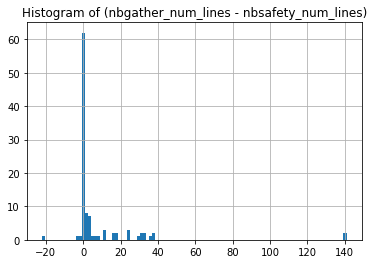

In [184]:
df['diff'] = df['nbgather_line_size'] - df['nbsafety_line_size']
df['diff'].hist(bins=100)
plt.title("Histogram of (nbgather_num_lines - nbsafety_num_lines)")
plt.show()

In [185]:
df.describe()

,nbsafety_line_size,nbgather_line_size,exit_status,nbsafety_slice_size,diff
count,103.000000,103.000000,103.0,103.000000,103.000000
mean,3.601942,10.902913,0.0,2.582524,7.300971
std,4.792436,25.031946,0.0,2.294598,21.539674
min,1.000000,1.000000,0.0,1.000000,-22.000000
25%,1.000000,1.000000,0.0,1.000000,0.000000
50%,2.000000,2.000000,0.0,2.000000,0.000000
75%,4.000000,6.000000,0.0,3.000000,3.500000
max,27.000000,165.000000,0.0,14.000000,141.000000


In [154]:
# df[df['nbsafety_line_size'] < 2].sort_values(by='nbgather_line_size', ascending=False).head(60)

In [186]:
df.sort_values(by='diff', ascending=False)

,key,nbsafety_line_size,nbgather_line_size,exit_status,nbsafety_slice_size,nbsafety_reproduced,diff
216,"(426, 1351)",24,165,0,3,True,141
237,"(428, 1351)",24,165,0,3,True,141
90,"(242, 94)",7,44,0,3,True,37
58,"(217, 94)",7,44,0,3,True,37
358,"(839, 1356)",22,58,0,3,True,36
...,...,...,...,...,...,...,...
114,"(256, 14)",1,1,0,1,True,0
199,"(417, 330)",2,2,0,2,True,0
288,"(687, 907)",3,2,0,2,True,-1
256,"(510, 101)",5,2,0,5,True,-3
